## 深度学习基础
#### 线性回归
#### soft回归
#### 多层感知机
#### 过耦合/欠耦合
#### 权重衰减
#### dropout(丢弃法)
#### 正向/反向传播和计算图
#### 模型初始化

1. [markdown 希腊字母](https://blog.csdn.net/huanhuan_Coder/article/details/79325118): 
$$\alpha$$
$$\beta$$
$$\gamma$$
$$\epsilon$$
$$\eta$$
$$\lambda$$
$$\phi$$
$$\varphi$$
$$\psi$$
2. 1/2 的来源: <b>常数 1/2 使对平方项求导后的常数系数为1</b>
3. 解析解, analytical solution, 可以用公式将解表达出来
4. 数值解, numberical solution, 大多数深度学习模型没有解析解, 只能用优化算法有限 次迭代模型参数 来尽可能减小损失函数
5. 小批量梯度下降: mini-batch stochastic gradient descent
6. 超参: 人为设定的参数, 并非通过模型训练得到
7. NDarray 的方法:
    - `take()`, 接受一个 ndarray, 获取ndrray的一部分
    - `random.normal()`, 参数: scale, 标准差, shape, 维度
8. 

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [2]:
# 生成 dataset: y = wx + b + noise, w_0 = 2, w_1 = -3.4
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
features[0], labels[0]

(
 [1.1630787 0.4838046]
 <NDArray 2 @cpu(0)>, 
 [4.879625]
 <NDArray 1 @cpu(0)>)

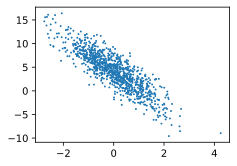

In [4]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);  # 加分号只显示图

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print('X: ', X, X.shape)
    print('y: ', y, y.shape)
    break

X:  
[[ 1.2710464   0.7802647 ]
 [-0.46311158 -0.53839856]
 [ 0.00958298 -1.3464084 ]
 [-0.2619561   0.21887824]
 [-0.23331244 -0.90960723]
 [-1.9584894   0.38114658]
 [-0.63260156  0.6264306 ]
 [-0.9439257   0.4915152 ]
 [-1.0767086   0.18912303]
 [-0.9740371  -0.4720347 ]]
<NDArray 10x2 @cpu(0)> (10, 2)
y:  
[ 4.089336   5.1078997  8.7929125  2.9307134  6.81124   -1.0243565
  0.8072544  0.6577085  1.4079186  3.843534 ]
<NDArray 10 @cpu(0)> (10,)


In [7]:
# 初始化参数
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1, ))

In [8]:
print("w: ", w)
print("b: ", b)

w:  
[[ 0.01464221]
 [-0.01305814]]
<NDArray 2x1 @cpu(0)>
b:  
[0.]
<NDArray 1 @cpu(0)>


In [9]:
# 为参数的迭代分配空间
w.attach_grad()
b.attach_grad()

In [10]:
def linreg(X, w, b):
    """
    定义模型
    """
    return nd.dot(X, w) + b

In [11]:
def squared_loss(y_hat, y):  
    """
    定义损失函数
    :param y_hat: ndarray, predicted result
    :param y: label
    """
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [12]:
def sgd(params, lr, batch_size):  
    """
    定义优化算法
    :param lr: scalar, learning rate
    :param params: 
    :params batch_size: size of mini batch
    """
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [13]:
# 训练模型
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。
    # X 和 y 分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.034855
epoch 2, loss 0.000124
epoch 3, loss 0.000049
epoch 4, loss 0.000048
epoch 5, loss 0.000048
epoch 6, loss 0.000048
epoch 7, loss 0.000048
epoch 8, loss 0.000048
epoch 9, loss 0.000048
epoch 10, loss 0.000048


In [14]:
true_w, w

([2, -3.4], 
 [[ 1.999983 ]
  [-3.3999166]]
 <NDArray 2x1 @cpu(0)>)

In [15]:
true_b, b

(4.2, 
 [4.200119]
 <NDArray 1 @cpu(0)>)

### 使用 Gluon 简洁实现

In [16]:
from mxnet import init as ginit
from mxnet.gluon.nn import Sequential, Dense
from mxnet.gluon import data as gdata, loss as gloss, Trainer as gTrainer

In [17]:
# 小批量 迭代数据集
batch_size = 10
dataset = gdata.ArrayDataset(features, labels)

In [18]:
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [19]:
type(data_iter)

mxnet.gluon.data.dataloader.DataLoader

In [20]:
for X, y in data_iter:
    print(X, y)  # 10个一批
    break


[[-1.197304   -0.0251092 ]
 [ 0.30383104 -0.8077589 ]
 [ 1.3810002  -0.76296663]
 [-0.29690048 -0.3066557 ]
 [-0.40185815  1.1101921 ]
 [ 1.2710464   0.7802647 ]
 [-0.24252191  0.41504627]
 [-0.20822777  1.1514316 ]
 [ 0.17579068  0.7437548 ]
 [ 2.845604   -0.5142364 ]]
<NDArray 10x2 @cpu(0)> 
[ 1.8984185   7.541996    9.539722    4.639848   -0.39217773  4.089336
  2.2984166  -0.12962557  2.036555   11.636032  ]
<NDArray 10 @cpu(0)>


In [21]:
net = Sequential()  # 串联所有层的容器

In [22]:
# 增加全连接层, 无须指定每一层输入的形状, 需要指定输出层的个数, 模型自动推断每一层的输入个数
net.add(Dense(1))  

In [23]:
net.initialize(ginit.Normal(sigma=0.01))  # 初始化模型参数

In [24]:
loss = gloss.L2Loss()  # 定义损失函数

In [25]:
lr = 0.03
coefficient = net.collect_params()
trainer = gTrainer(coefficient, 'sgd', {'learning_rate': 0.03})

In [26]:
# 训练模型
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.035217
epoch 2, loss: 0.000125
epoch 3, loss: 0.000049
epoch 4, loss: 0.000048
epoch 5, loss: 0.000048
epoch 6, loss: 0.000049
epoch 7, loss: 0.000048
epoch 8, loss: 0.000048
epoch 9, loss: 0.000048
epoch 10, loss: 0.000048


In [27]:
trainer.step?
# 更新参数

SyntaxError: invalid syntax (<ipython-input-27-afa0cd38effa>, line 1)

### 练习
1. 如果将l = loss(net(X), y)替换成l = loss(net(X), y).mean()，需要将trainer.step(batch_size)相应地改成trainer.step(1)
    - 求和公式 怎么求导? 不应该从这个方向考虑, 应该从 gluon如何更新参数上考虑
    - 如果loss取mean()，step的时候就不用平均
2. 如何访问dense.weight的梯度: `dense.weight.grad()`

In [ ]:
net[0].weight.grad()

In [ ]:
net[0].bias.grad()